 Web scraping, web harvesting, or web data extraction is data scraping used for extracting data from websites     - Wikipedia

In this notebook we will see an example of web scrapping and use it to list out the laptop prices listed on Amazon


Prerequisites
1. We will be using basic python and HTML , but however there is no need to know these languages 
2. It will help a little to know basic CSS 

In [1]:
!pip install selenium                 #install selenium 
!apt-get update -y                    # update 
!apt install chromium-chromedriver -y #install chrome driver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install beautifulsoup4           #install beautiful soup
import pandas as pd
import sys
import time
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')


ERROR: Invalid requirement: '#install'
'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt' is not recognized as an internal or external command,
operable program or batch file.
'cp' is not recognized as an internal or external command,
operable program or batch file.
ERROR: Invalid requirement: '#install'


A small Note - The above code snippet can be copied and used for google collab as well

**Selenium automates browsers. That's it!**
Now how cool does that sound !
1.     With just a few steps you can automate Movie Bokings
2.     Automate your grocery shopping
3.     Create custom testing Scripts 
4.     Automate just about anything that requires interaction with the internet 

Primarily it is for automating web applications for testing purposes, but is certainly not limited to just that.

Boring web-based administration tasks can (and should) also be automated as well.
    - Selenium dev

Now that we have installed the required packages it's time to import them and scrape some information from amazon 

In [2]:
from selenium import webdriver                    #import webDriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')        #remove this for easy debbuing on your laptop /pc
chrome_options.add_argument('--no-sandbox')                             
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)


url = "https://www.amazon.in/"            #url 
wd.get(url)                               

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  


wd.get(url) - This line of code opens the url in a new chrome window 

the url is now opened and we can now use the wd variable to navigate through the amazon website

We will be using the following in built functions to navigate the webpage 
I will leave the link for documentation for better understanding
1. element = driver.find_element_by_id("some_id")
2. element = driver.find_element_by_xpath("some xPath)
3. link to documentation - https://selenium-python.readthedocs.io/navigating.html

In [3]:
html = wd.page_source
html #show the html code of the document

'<html lang="en-in" class=" a-js a-audio a-video a-canvas a-svg a-drag-drop a-geolocation a-history a-webworker a-autofocus a-input-placeholder a-textarea-placeholder a-local-storage a-gradients a-transform3d a-touch-scrolling a-text-shadow a-text-stroke a-box-shadow a-border-radius a-border-image a-opacity a-transform a-transition null" data-19ax5a9jf="dingo" data-aui-build-date="3.21.4-2021-05-11" data-useragent="Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/90.0.4430.93 Safari/537.36" data-platform="Linux x86_64"><!-- sp:feature:head-start --><head><script async="" src="https://c.amazon-adsystem.com/bao-csm/forensics/a9-tq-forensics-incremental.min.js" crossorigin="anonymous"></script><script async="" src="https://images-eu.ssl-images-amazon.com/images/I/31YXrY93hfL.js" crossorigin="anonymous"></script><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8">\n\n<script type="text/javascript">var ue_t0=ue_t0||+new Date();

The above HTML code is pretty hard to read so we will convert it to a soup object and pretiffy it.This is done to find the relevant tags

In [4]:
from bs4 import BeautifulSoup as bs
soup = bs(html)
print(soup.prettify()) #also show the html code of the document ;but this is readable

<html class="a-js a-audio a-video a-canvas a-svg a-drag-drop a-geolocation a-history a-webworker a-autofocus a-input-placeholder a-textarea-placeholder a-local-storage a-gradients a-transform3d a-touch-scrolling a-text-shadow a-text-stroke a-box-shadow a-border-radius a-border-image a-opacity a-transform a-transition null" data-19ax5a9jf="dingo" data-aui-build-date="3.21.4-2021-05-11" data-platform="Linux x86_64" data-useragent="Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/90.0.4430.93 Safari/537.36" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script async="" crossorigin="anonymous" src="https://c.amazon-adsystem.com/bao-csm/forensics/a9-tq-forensics-incremental.min.js">
  </script>
  <script async="" crossorigin="anonymous" src="https://images-eu.ssl-images-amazon.com/images/I/31YXrY93hfL.js">
  </script>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <script type="text/javascript">
 

An alternative and an user friendly approach is to use inspect element to obtain  the nessary information 
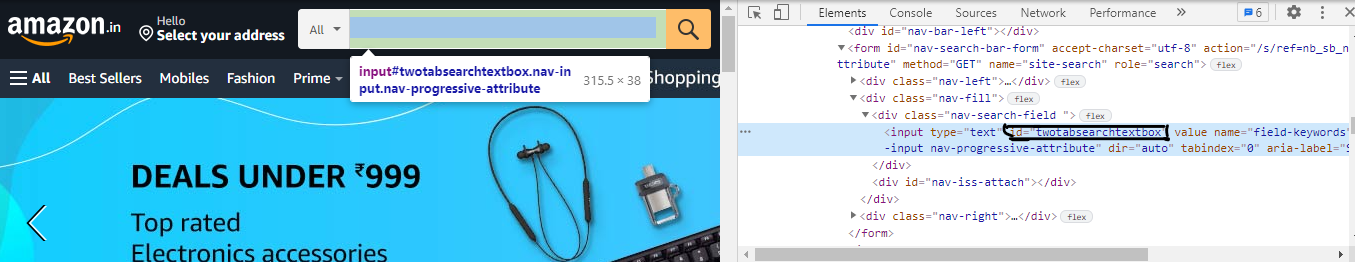

In [5]:
#the search bar on amazon has the
#id attribute as twotabsearchtextbox
#find_element_by_id finds the element with the 
#given id, we can use it to interact with the element
element = wd.find_element_by_id("twotabsearchtextbox")

Now that we have the element we can use other functions to interact with it
1. element.send_keys("some text") -> sends the keys as input to the element
2. element.click() -> clicks on the element

Now to simplify the term element -  An element can be a tag, property, or anything
    

In [6]:
from selenium.webdriver.common.keys import Keys
element.send_keys("Laptop")   #same as typing Laptop into the amazon search bar
element.send_keys(Keys.ENTER) #same as hitting enter
time.sleep(10)

Now we have searched for laptop using selenium ,
now to view the html cde and extract information


In [7]:
#html = wd.page_source
#html
#soup = bs(html)
#print(soup.prettify())

Now we inspect the webpage to obtain the container element of 
all the listed items on amazon

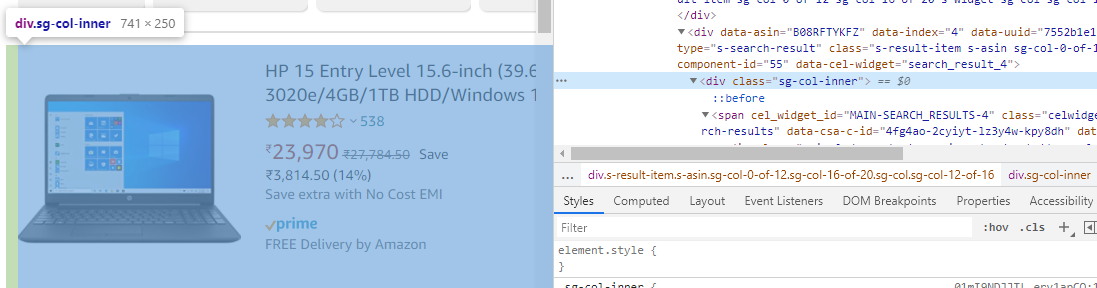

In [8]:
#The bellow code finds all the div elements in the webpage with the class attribute as 'sg-col-inner'
elements = wd.find_elements_by_class_name('sg-col-inner')

In [9]:
names =  []
prices = []
links =  []
from selenium.common.exceptions import NoSuchElementException
for element in elements:
    try: #more abut xpath in the following cell
        name = element.find_element_by_xpath(".//span[@class = 'a-size-medium a-color-base a-text-normal']").text
        price = element.find_element_by_xpath(".//span[@class = 'a-price-whole']").text
        link = element.find_element_by_xpath(".//a[@class = 'a-size-base a-link-normal a-text-normal']").get_attribute('href')
        prices.append(price)
        names.append(name)
        links.append(link)
    except:
        NoSuchElementException          
        
# some elements might have the same class name as the parent class name for the emements 
# in that case if we don't use try catch we might get NoSuchElementException
#many webpages these days re use the CSS these days 

XPath in Selenium is an XML path used for navigation through the HTML structure of the page. It is a syntax or language for finding any element on a web page using XML path expression. XPath can be used for both HTML and XML documents to find the location of any element on a webpage using HTML DOM structure.

    -https://www.guru99.com/xpath-selenium.html#:~:text=XPath%20in%20Selenium%20is%20an,webpage%20using%20HTML%20DOM%20structure.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/FD5c2BN/Screenshot-2021-05-16-140925.png" alt="Screenshot-2021-05-16-140925" border="0"></a>

Now that can be a little confusing , so to simplify Xpath is used to find web elements such as tags , buttons etc , using an XML epression for example 
Xpath=//tagname[@attribute='value']
The breakdown of the above expression can be as follows 
1.     // - Select or search the whole web-page
2.     tagname -  Name of the HTML tag ;example - span , li , ul
3.     @attribute - an attribute useful to identify the element or group of elements ;example -class, id ,etc 
4.     value      - value of the attribute ; example class = "my_class , id = "my_id"

<a href="https://imgbb.com/"><img src="https://i.ibb.co/kQWkKK9/1.png" alt="1" border="0"></a><br /><a target='_blank' href='https://imgbb.com/'>0 images</a><br />

<a href="https://imgbb.com/"><img src="https://i.ibb.co/ZMM53Z1/2.png" alt="2" border="0"></a><br /><a target='_blank' href='https://imgbb.com/'>url photo editor</a><br />

Note - Relative Xpath is preferred over absolute Xpath , since a small change in the web-page can render the absolute Xpath useless

More tutorials on Xpath - 
1. https://www.w3schools.com/xml/xpath_syntax.asp
2. https://www.tutorialspoint.com/xpath/index.htm

Now to convert data to a pandas dataframe

In [10]:
dfL = pd.DataFrame(zip(names, prices ,links), columns=['ItemName','Price','Href'])
dfL

,ItemName,Price,Href
0,HP 15 (2021) Thin & Light 11th Gen Core i5 Lap...,"59,653",https://www.amazon.in/gp/slredirect/picassoRed...
1,HP 15 (2021) Thin & Light 11th Gen Core i5 Lap...,"59,653",https://www.amazon.in/gp/slredirect/picassoRed...
2,HP 15 (2021) Thin & Light 11th Gen Core i5 Lap...,"59,653",https://www.amazon.in/gp/slredirect/picassoRed...
3,Acer Nitro 5 Intel Core i7-11th Generation 144...,"84,990",https://www.amazon.in/gp/slredirect/picassoRed...
4,Acer Nitro 5 Intel Core i7-11th Generation 144...,"84,990",https://www.amazon.in/gp/slredirect/picassoRed...
5,HP 15 Intel Pentium Gold 6405U Processor Entry...,"25,990",https://www.amazon.in/HP-Pentium-Processor-15-...
6,HP 15 Intel Pentium Gold 6405U Processor Entry...,"25,990",https://www.amazon.in/HP-Pentium-Processor-15-...
7,"AVITA Essential NE14A2INC433-MB 14"" (35.56cms)...","17,990",https://www.amazon.in/AVITA-Essential-NE14A2IN...
8,"AVITA Essential NE14A2INC433-MB 14"" (35.56cms)...","17,990",https://www.amazon.in/AVITA-Essential-NE14A2IN...
9,Lenovo Ideapad Slim 3 AMD Athlon Silver 3050U ...,"28,240",https://www.amazon.in/Lenovo-Ideapad-Windows-P...


However those are the results present only in the first page,
We now use selenium to navigate to the next page  and view the results there


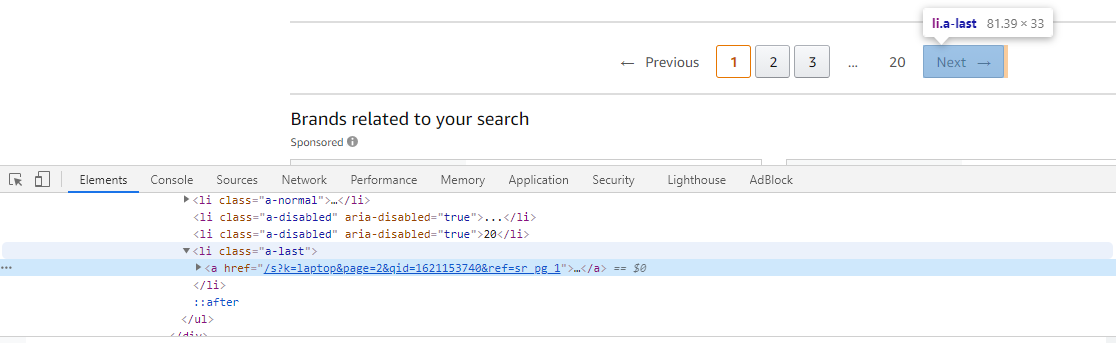

The bellow function is simply the same code above i used for navigating the document and finding relevant information

In [11]:
def add_data(a,b,c):
    elements = wd.find_elements_by_class_name('sg-col-inner')
    for element in elements:
        try:
            name = element.find_element_by_xpath(".//span[@class = 'a-size-medium a-color-base a-text-normal']").text
            price = element.find_element_by_xpath(".//span[@class = 'a-price-whole']").text
            link = element.find_element_by_xpath(".//a[@class = 'a-size-base a-link-normal a-text-normal']").get_attribute('href')
            b.append(price)
            a.append(name)
            c.append(link)
        except:
            NoSuchElementException  
    return a,b,c

The above function takes in the arguments as our original lists, appends the new data into them and returns the lists back

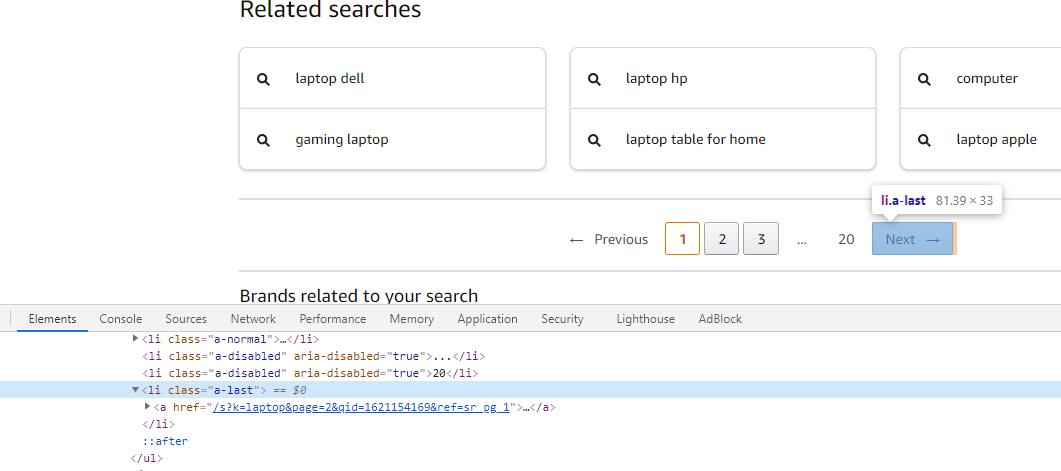

"//li[@class = 'a-last']/a") - Find the element a(a tag is used for redirecting users to another webpage ) whose parent is a li(tag name of the parent ) with the class as "a-last"

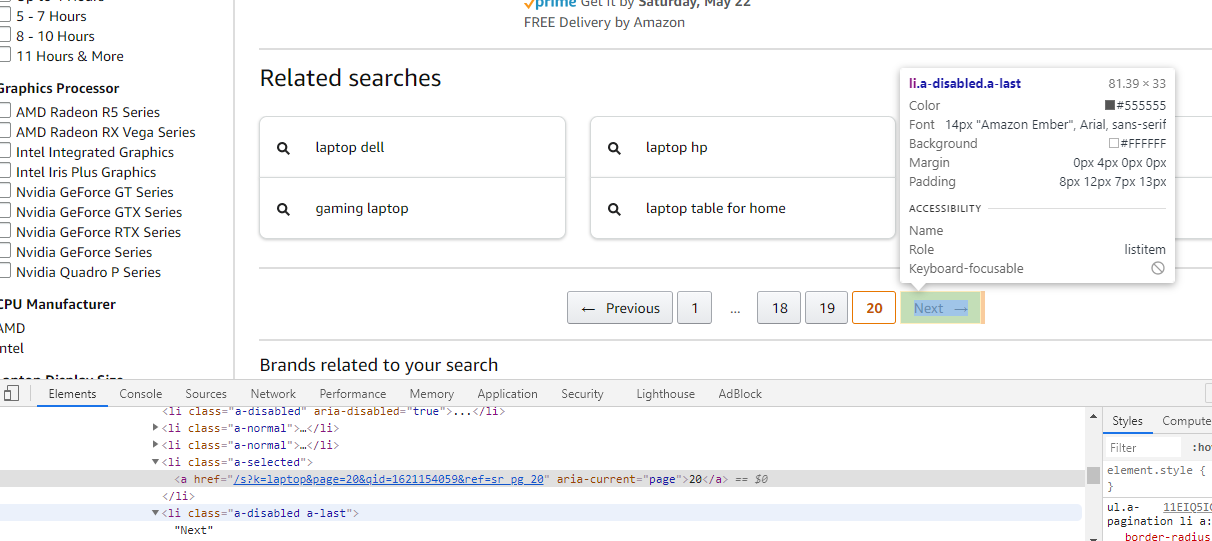

Since the class name changed , the element is no longer present and we will simply come out from the loop

Now we simply loop this statement - what this does is simple ,it simply keeps checking the document for this tag and keeps pressing it ; this will keep redirecting us to the secnd page , the third one etc until we reach the end of the document

In [12]:
c = -1
import time
while c!=0:
    try:
        wd.find_element_by_xpath("//li[@class = 'a-last']/a").click()
        time.sleep(10)   #sometime the webpage dosen't load in time and this can raise NoSuchElementException
        names, prices ,links = add_data(names, prices ,links)
    except NoSuchElementException:
        print("end of Search Results")
        c = 0

end of Search Results


The above code clicks on the next button while it is present in the webpage,and calls the get data function

Now to convert our data to a dataframe for better understanding 

In [13]:
dfNew = pd.DataFrame(zip(names, prices ,links), columns=['ItemName','Price','Href'])

Some of our results might be repeated , this can happen when the same product is listed twice on Amazon or due to bad Xpath


In [14]:
dfNew.drop_duplicates(inplace = True) #drop duplicates 

Now convert the data to a csv file

In [15]:
dfNew.to_csv('out.csv', index=False)

In [16]:
ls

__notebook__.ipynb  out.csv


In [17]:
dfNew

,ItemName,Price,Href
0,HP 15 (2021) Thin & Light 11th Gen Core i5 Lap...,"59,653",https://www.amazon.in/gp/slredirect/picassoRed...
3,Acer Nitro 5 Intel Core i7-11th Generation 144...,"84,990",https://www.amazon.in/gp/slredirect/picassoRed...
5,HP 15 Intel Pentium Gold 6405U Processor Entry...,"25,990",https://www.amazon.in/HP-Pentium-Processor-15-...
7,"AVITA Essential NE14A2INC433-MB 14"" (35.56cms)...","17,990",https://www.amazon.in/AVITA-Essential-NE14A2IN...
9,Lenovo Ideapad Slim 3 AMD Athlon Silver 3050U ...,"28,240",https://www.amazon.in/Lenovo-Ideapad-Windows-P...
...,...,...,...
557,Life Digital Laptop 15.6-inch (39.62 cms) (Int...,"31,990",https://www.amazon.in/LifeDigital-Laptop-Intel...
559,Dell Inspiron 5406 2in1 14inch FHD Touch Lapto...,"54,750",https://www.amazon.in/Dell-Inspiron-5406-i3-11...
561,ASUS VivoBook S14 Intel Core i5-1035G1 10th Ge...,"59,990",https://www.amazon.in/ASUS-VivoBook-i5-1035G1-...
563,HP Pavilion x360 Core i3 Touchscreen 14-inch (...,"55,800",https://www.amazon.in/HP-Pavilion-Touchscreen-...
